In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [3]:
transform = transforms.Compose([
    transforms.ToTensor()
])

In [4]:
train_dataset = datasets.MNIST(root='.', train=True, transform=transform, download=True)
test_dataset  = datasets.MNIST(root='.', train=False, transform=transform, download=True)

100%|██████████| 9.91M/9.91M [00:00<00:00, 128MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 38.9MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 112MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.00MB/s]


In [5]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader  = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

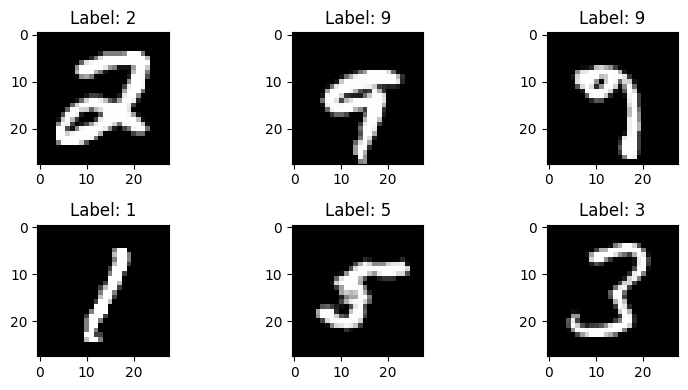

In [12]:
examples = enumerate(train_loader)
batch_idx, (example_data, example_targets) = next(examples)

plt.figure(figsize=(8, 4))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(example_data[i][0], cmap='gray')
    plt.title(f"Label: {example_targets[i].item()}")
plt.tight_layout()
plt.show()

In [7]:
class MNISTModel(nn.Module):
    def __init__(self):
        super().__init__()

        # Layer 1: 784 → 128
        self.fc1 = nn.Linear(28*28, 128)

        # Layer 2: 128 → 64
        self.fc2 = nn.Linear(128, 64)

        # Output Layer: 64 → 10 (digits 0–9)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        # Flatten from [64, 1, 28, 28] → [64, 784]
        x = x.view(-1, 28*28)

        # Layer 1 + ReLU
        x = F.relu(self.fc1(x))

        # Layer 2 + ReLU
        x = F.relu(self.fc2(x))

        # Output layer (NO softmax here, handled by loss)
        x = self.fc3(x)
        return x

In [8]:
model = MNISTModel()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [9]:
epochs = 5

for epoch in range(epochs):
    epoch_loss = 0
    for images, labels in train_loader:

        # ---- Forward Pass ----
        outputs = model(images)

        # ---- Loss Calculation ----
        loss = criterion(outputs, labels)

        # ---- Clear old gradients ----
        optimizer.zero_grad()

        # ---- Backpropagation ----
        loss.backward()

        # ---- Update weights ----
        optimizer.step()

        epoch_loss += loss.item()

    print(f"Epoch {epoch+1}, Average Loss: {epoch_loss / len(train_loader):.4f}")

Epoch 1, Average Loss: 0.3384
Epoch 2, Average Loss: 0.1415
Epoch 3, Average Loss: 0.0956
Epoch 4, Average Loss: 0.0735
Epoch 5, Average Loss: 0.0572


In [10]:
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")


Test Accuracy: 97.46%


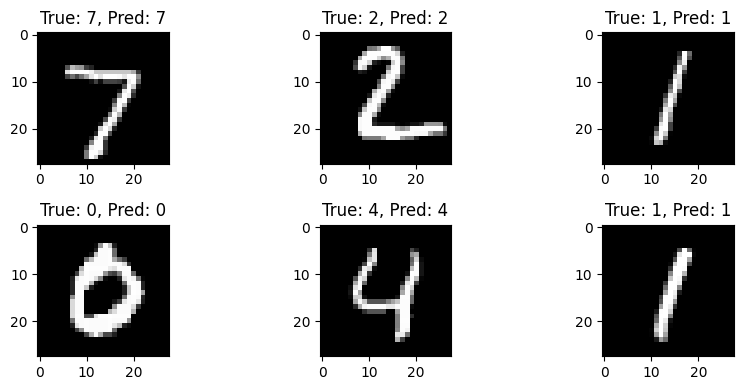

In [11]:
images, labels = next(iter(test_loader))
outputs = model(images)
_, predicted = torch.max(outputs, 1)

plt.figure(figsize=(9, 4))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i][0], cmap='gray')
    plt.title(f"True: {labels[i].item()}, Pred: {predicted[i].item()}")
plt.tight_layout()
plt.show()